# TASK1: Download the dataset

In [1]:
#IMPORT THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# TASK2: Load the dataset into the tool

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Task 3: Visualization
 - univarient
   - barchart,histogram,pie chart,frequency polygram
 - Bivarient 
     - scatterplot,Linear correleation
 - multiVarient

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

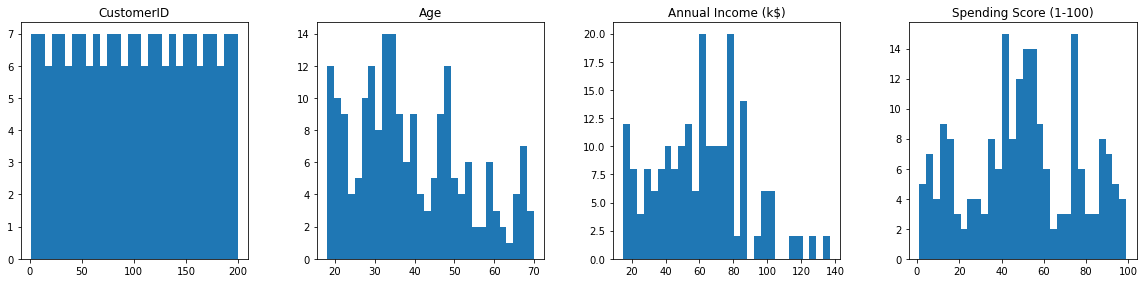

In [3]:
#univarient
df.hist(figsize=(20,10),grid=False,layout=(2,4),bins=30)

<BarContainer object of 200 artists>

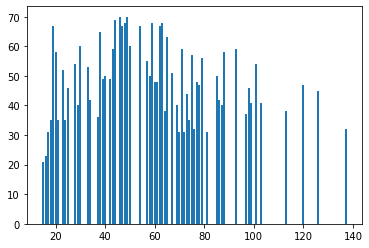

In [4]:
plt.bar(data=df,height="Age",x="Annual Income (k$)")

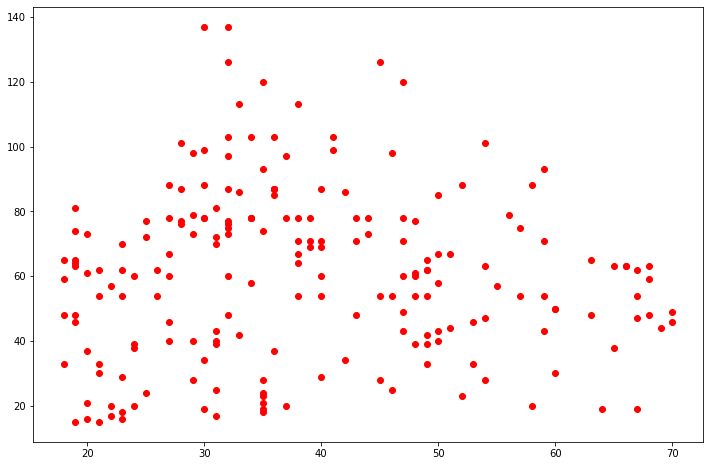

In [5]:
#bivarient
fig=plt.figure(figsize=(12,8))
plt.scatter(df['Age'],df['Annual Income (k$)'],color='red')

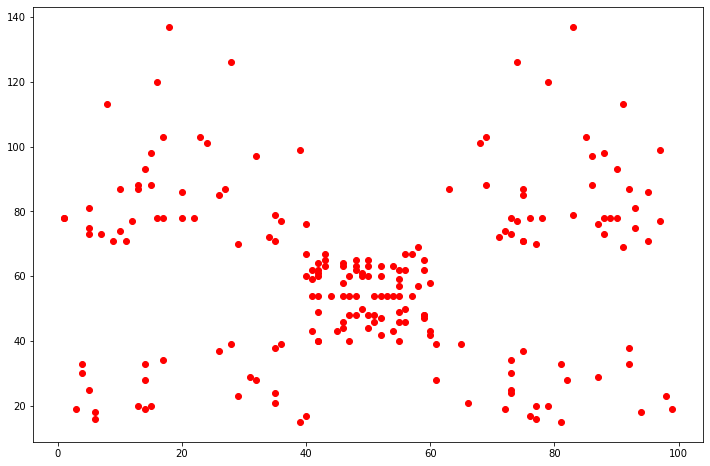

In [6]:
fig=plt.figure(figsize=(12,8))
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'],color='red')

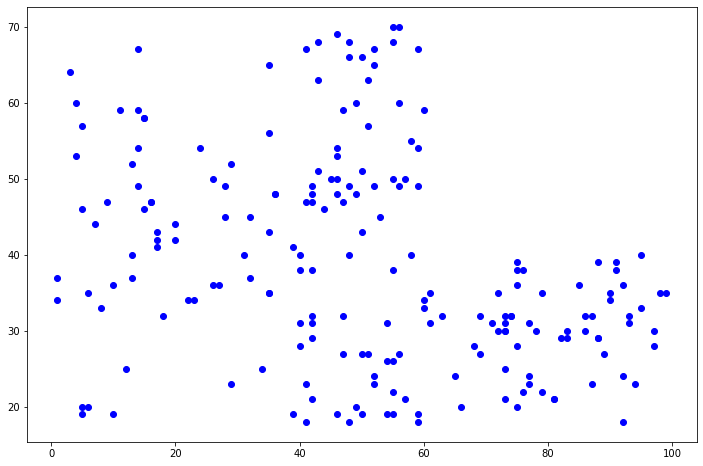

In [7]:
fig=plt.figure(figsize=(12,8))
plt.scatter(df['Spending Score (1-100)'],df['Age'],color='Blue')

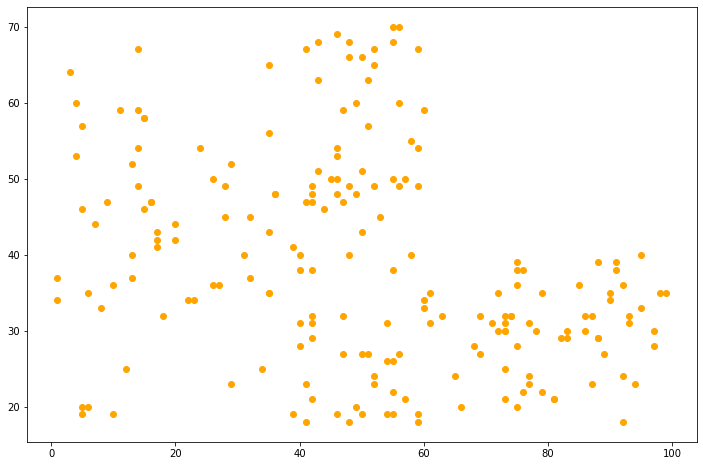

In [8]:
fig=plt.figure(figsize=(12,8))
plt.scatter(df['Spending Score (1-100)'],df['Age'],color='orange')

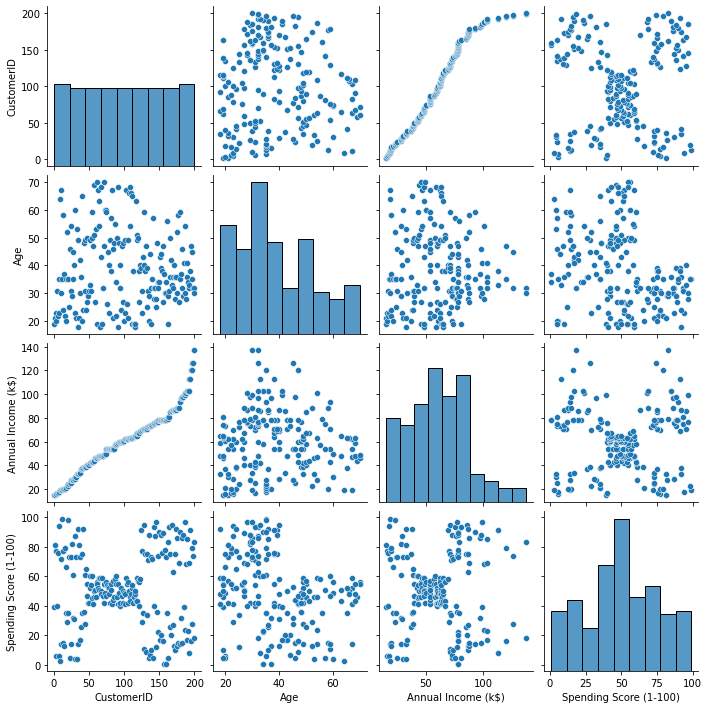

In [9]:
#multivarient analysis
sns.pairplot(df)

<AxesSubplot:>

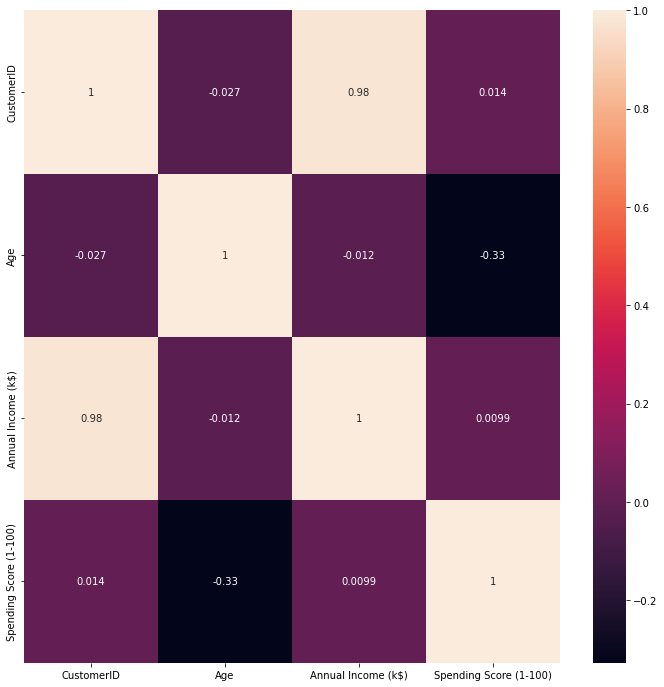

In [10]:
df.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True)

# TASK4:Perform descriptive statistics on the dataset.

In [11]:
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# TASK5:Check for Missing values and deal with them.

In [14]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# TASK6:Find the outliers and replace them outliers

<AxesSubplot:xlabel='Age'>

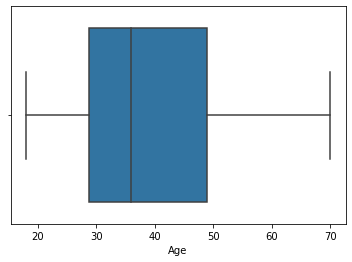

In [15]:
sns.boxplot(df['Age'])


<AxesSubplot:xlabel='Annual Income (k$)'>

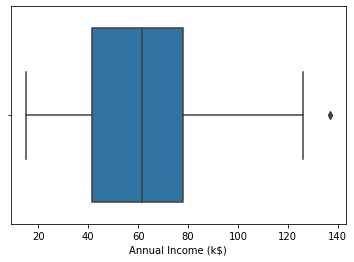

In [16]:
sns.boxplot(df['Annual Income (k$)'])

In [17]:
#quantile
qnt=df.quantile(q=(0.75,0.25))
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [18]:
#IQR calculations
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [19]:
#lower extreme value
lower_val=qnt.loc[0.25]-1.5*iqr
lower_val

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

61.5


<AxesSubplot:xlabel='Annual Income (k$)'>

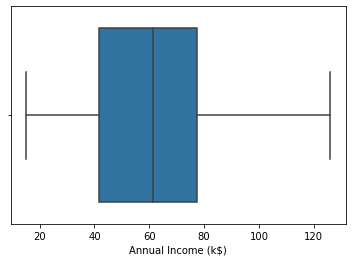

In [20]:
#replacing the outliers
median=df['Annual Income (k$)'].median()
print(median)
df['Annual Income (k$)']=df['Annual Income (k$)'].mask(df['Annual Income (k$)']>130,61.5)
sns.boxplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)'>

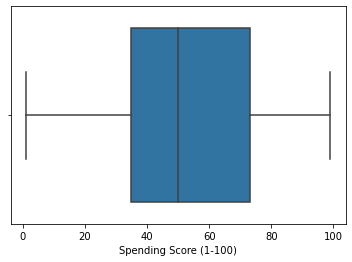

In [21]:
sns.boxplot(df['Spending Score (1-100)'])

# TASK7:Check for Categorical columns and perform encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if(df[i].dtype=='object'):
        df[i]=le.fit_transform(df[i])

# TASK8:Scaling the data

In [23]:
data=df.drop(['CustomerID'],axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [24]:
#scalling data
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
#scalingData=scale.fit_transform(data.iloc[:,:3])
scalingData=scale.fit_transform(data)
scalingData

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

# TASK9:  Perform any of the clustering algorithms

In [25]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,12))

for i in k:
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(data)
  TWSS.append(kmeans.inertia_)

TWSS

[201152.1081841432,
 139326.23321730684,
 100349.31619915173,
 71419.31019600156,
 54455.93879921248,
 48692.479074645846,
 43313.71899120991,
 39664.19972596674,
 36260.69184859953,
 33046.48372883182]

Text(0, 0.5, 'TWSS')

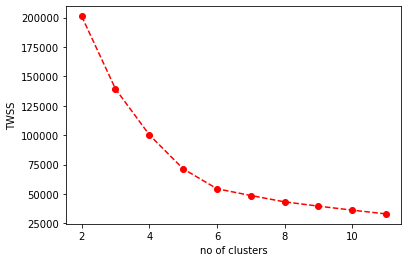

In [26]:
#scree plot elbow curve

plt.plot(k,TWSS,'ro--')
plt.xlabel('no of clusters')
plt.ylabel('TWSS')

# TASK10:  Add the cluster data with the primary dataset

In [27]:
#selecting  3 clusters
model=KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [28]:
#get the labels
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [29]:
#converting in series
mb=pd.Series(model.labels_)

In [30]:
data['output']=mb
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),output
0,1,19,15.0,39,0
1,1,21,15.0,81,0
2,0,20,16.0,6,0
3,0,23,16.0,77,0
4,0,31,17.0,40,0


In [31]:
data.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),output
195,0,35,120.0,79,1
196,0,45,126.0,28,2
197,1,32,126.0,74,1
198,1,32,61.5,18,2
199,1,30,61.5,83,1


# TASK11:Split the data into dependent and independent variables

In [32]:
idv=data.iloc[:,:-1]#independent variables
dv=data.iloc[:,-1]#dependent variables
dv

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    2
197    1
198    2
199    1
Name: output, Length: 200, dtype: int32

# TASK12:  Split the data into training and testing

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(idv,dv,test_size=0.2,shuffle=True)

In [34]:
scalingData_train=scale.fit_transform(x_train)
scalingData_train

array([[1.        , 0.32692308, 0.08108108, 0.34693878],
       [1.        , 0.92307692, 0.43243243, 0.47959184],
       [1.        , 0.28846154, 0.88288288, 0.07142857],
       [0.        , 0.92307692, 0.43243243, 0.5       ],
       [0.        , 0.96153846, 0.3963964 , 0.55102041],
       [0.        , 0.34615385, 0.63063063, 0.75510204],
       [1.        , 0.11538462, 0.20720721, 0.92857143],
       [1.        , 0.69230769, 0.43243243, 0.45918367],
       [0.        , 0.17307692, 0.27927928, 0.51020408],
       [0.        , 0.55769231, 0.30630631, 0.41836735],
       [1.        , 0.01923077, 0.2972973 , 0.59183673],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.61538462, 0.38738739, 0.45918367],
       [1.        , 0.28846154, 0.24324324, 0.60204082],
       [1.        , 0.26923077, 0.52252252, 0.73469388],
       [0.        , 0.36538462, 0.73873874, 0.31632653],
       [0.        , 0.09615385, 0.35135135, 0.52040816],
       [1.        , 0.57692308,

In [35]:
print(x_train.shape,"\n",y_train.shape)

(160, 4) 
 (160,)


In [36]:
print(x_test.shape,"\n",y_test.shape)

(40, 4) 
 (40,)


# TASK13:  Build the Model

In [37]:
from sklearn.linear_model import LinearRegression
LinearModel=LinearRegression()

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [39]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear')

# TASK14:Train the Model

In [40]:
LinearModel.fit(x_train,y_train)

LinearRegression()

In [41]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

# TASK15:Test the Model

In [43]:
Linear_pred=LinearModel.predict(x_test)

In [44]:
Linear_pred

array([ 1.72849866,  0.72207625,  0.13959257, -0.41427137, -0.40077472,
        0.55113534,  0.52236283,  1.21646627, -0.15514852, -0.3650622 ,
        1.33956932, -0.20660869,  0.34591948,  2.32046408,  0.76202084,
       -0.15794792,  2.28638195,  0.25804366, -0.55523887,  0.06981997,
        0.94814978,  0.50836136,  0.06399144,  1.05550746,  1.46616837,
        1.42969476,  0.47283359, -0.13693136,  0.5513391 ,  1.13504514,
       -0.49272635,  0.21578508,  1.49646882,  0.60449264,  0.7347949 ,
       -0.15570223,  0.62138639,  0.63712661, -0.16483008,  0.38816408])

In [45]:
forest_pred=forest.predict(x_test)
forest_pred

array([1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [46]:
svm_pred=svm_model.predict(x_test)
svm_pred

array([1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

# TASK16: Measure the performance using Evaluation Metrics.

In [47]:
LinearModel.coef_

array([ 0.02379935, -0.0114188 ,  0.02393469, -0.0110303 ])

In [48]:
svm_model.coef_

array([[-0.00727456,  0.02473878, -0.13346739, -0.10985372],
       [-0.03272221, -0.0215337 , -0.24609602,  0.17495048],
       [ 0.00361558, -0.00451183,  0.00620174,  0.08461794]])

In [49]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix

print("Accuracy:")
print("LINEAR MODEL",r2_score(y_test,Linear_pred))
print("FOREST MODEL",accuracy_score(y_test,forest_pred))
print("SVM MODEL",accuracy_score(y_test,svm_pred))

Accuracy:
LINEAR MODEL 0.6124961343039828
FOREST MODEL 1.0
SVM MODEL 1.0


In [50]:
#Rmse
print("ROOT MEAN SQUARE ERROR")
print("LINEAR MODEL",np.sqrt(mean_squared_error(y_test,Linear_pred)))
print("FOREST MODEL",np.sqrt(mean_squared_error(y_test,forest_pred)))
print("SVM MODEL",np.sqrt(mean_squared_error(y_test,svm_pred)))


ROOT MEAN SQUARE ERROR
LINEAR MODEL 0.48117934260873085
FOREST MODEL 0.0
SVM MODEL 0.0


In [51]:
print("Confusion Matrix:")
print("FOREST MODEL \n",confusion_matrix(y_test,forest_pred),"\n\n")
print("SVM MODEL \n",confusion_matrix(y_test,svm_pred))

Confusion Matrix:
FOREST MODEL 
 [[25  0  0]
 [ 0  8  0]
 [ 0  0  7]] 


SVM MODEL 
 [[25  0  0]
 [ 0  8  0]
 [ 0  0  7]]
